In [446]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data, color, filters
from skimage import img_as_float
import skimage.io as skio
import cv2
from scipy.ndimage import gaussian_filter, convolve
from skimage.transform import resize

1.1: Finite Difference Operator

In [405]:
img_pth = "cameraman.png"
im = skio.imread(img_pth)
im_rgb = im[:, :, :3]

im_gray = color.rgb2gray(im_rgb)
im_gray = img_as_float(im_gray)

d_x = np.array([[1,-1]])
d_y = np.array([[1],
                [-1]])

partial_x = convolve2d(im_gray, d_x, mode='same', boundary='symm')
partial_y = convolve2d(im_gray, d_y, mode='same', boundary='symm')

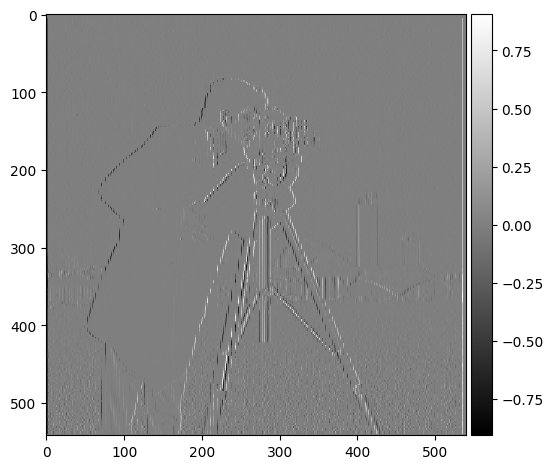

In [406]:
skio.imshow(partial_x, cmap="gray")
partial_x_normalized = partial_x - partial_x.min()
partial_x_normalized = partial_x_normalized / partial_x_normalized.max()

# Step 2: Scale to [0, 255] and convert to uint8
partial_x_8bit = (partial_x_normalized * 255).astype(np.uint8)
skio.imsave("partial_x.jpg",partial_x_8bit, cmap="gray")

In [407]:
partial_y_normalized = partial_y - partial_y.min()
partial_y_normalized = partial_y_normalized / partial_y_normalized.max()

partial_y_8bit = (partial_y_normalized * 255).astype(np.uint8)
skio.imsave("partial_y.jpg",partial_y_8bit, cmap="gray")

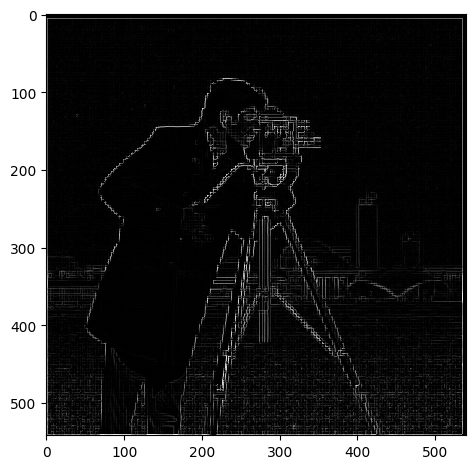

In [408]:
gradient_magnitude = np.sqrt(partial_x**2 + partial_y**2)
gradient_magnitude = gradient_magnitude/gradient_magnitude.max()
skio.imshow(gradient_magnitude)
partial_y_normalized = gradient_magnitude - gradient_magnitude.min()
partial_y_normalized = partial_y_normalized / partial_y_normalized.max()

partial_y_8bit = (partial_y_normalized * 255).astype(np.uint8)
skio.imsave("finite_gradient.jpg",partial_y_8bit, cmap="gray")

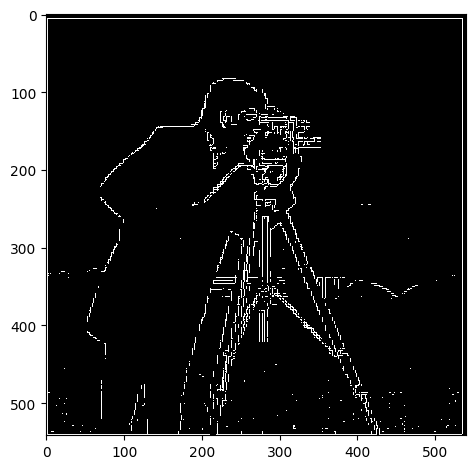

In [409]:
threshold = 0.25
edge_manual = gradient_magnitude>threshold
skio.imshow(edge_manual)

gradient_magnitude = np.sqrt(edge_manual**2 + edge_manual**2)
gradient_magnitude = gradient_magnitude/gradient_magnitude.max()
skio.imshow(gradient_magnitude)
partial_y_normalized = gradient_magnitude - gradient_magnitude.min()
partial_y_normalized = partial_y_normalized / partial_y_normalized.max()

partial_y_8bit = (partial_y_normalized * 255).astype(np.uint8)
skio.imsave("finite_edge.jpg",partial_y_8bit, cmap="gray")

1.2: DoG

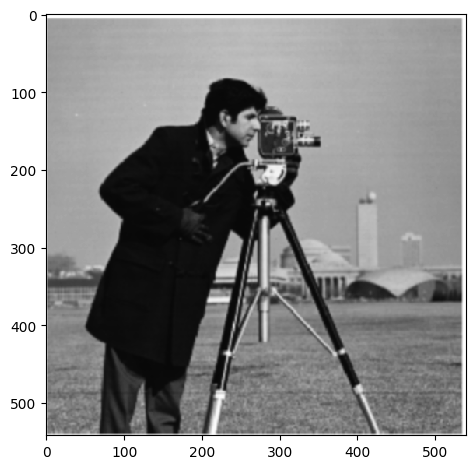

In [410]:
gaussian_1d = cv2.getGaussianKernel(ksize=5, sigma=1)
gaussian_2d = gaussian_1d @ gaussian_1d.T
im_blurred = convolve2d(im_gray, gaussian_2d, mode='same', boundary='symm')
skio.imshow(im_blurred)
plt.imsave("blur.jpg", partial_x, cmap='gray')

The image is slightly blurrier and smoothens the edges (high frequency components)

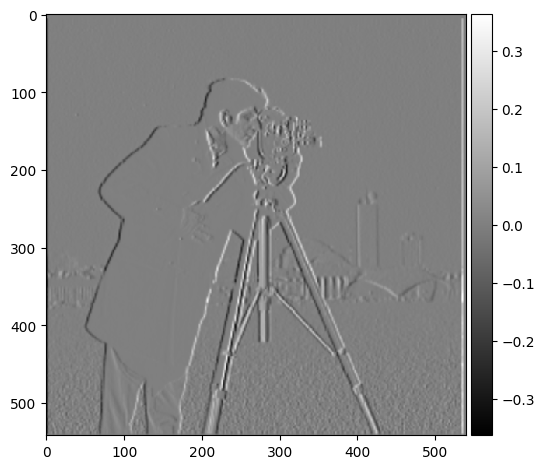

In [411]:
partial_x_blur = convolve2d(im_blurred, d_x, mode='same', boundary='symm')
partial_y_blur = convolve2d(im_blurred, d_y, mode='same', boundary='symm')
gradient_magnitude_blur = np.sqrt(partial_x_blur**2 + partial_y_blur**2)
gradient_magnitude_blur = gradient_magnitude_blur/gradient_magnitude_blur.max()

skio.imshow(partial_x_blur, cmap = "gray")
partial_y_normalized = partial_x_blur - partial_x_blur.min()
partial_y_normalized = partial_y_normalized / partial_y_normalized.max()

partial_y_8bit = (partial_y_normalized * 255).astype(np.uint8)
skio.imsave("dog_x.jpg", partial_y_8bit, cmap='gray')

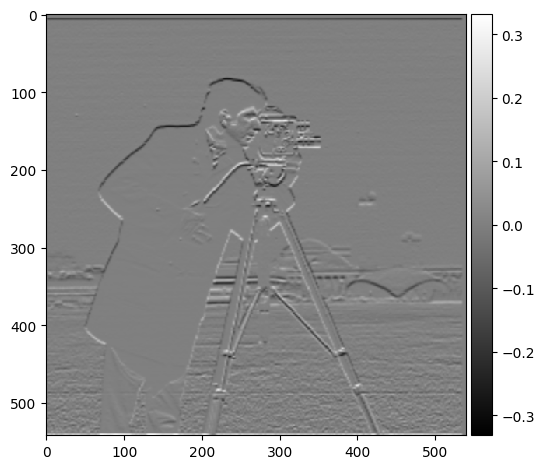

In [412]:
skio.imshow(partial_y_blur, cmap = "gray")
partial_y_normalized = partial_y_blur - partial_y_blur.min()
partial_y_normalized = partial_y_normalized / partial_y_normalized.max()

partial_y_8bit = (partial_y_normalized * 255).astype(np.uint8)
skio.imsave("dog_y.jpg", partial_y_8bit, cmap='gray')

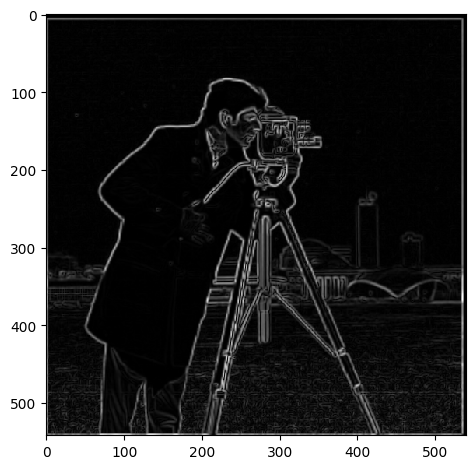

In [413]:
skio.imshow(gradient_magnitude_blur)
partial_y_normalized = gradient_magnitude_blur - gradient_magnitude_blur.min()
partial_y_normalized = partial_y_normalized / partial_y_normalized.max()

partial_y_8bit = (partial_y_normalized * 255).astype(np.uint8)
plt.imsave("dog_magnitude.jpg", partial_y_8bit, cmap="gray")

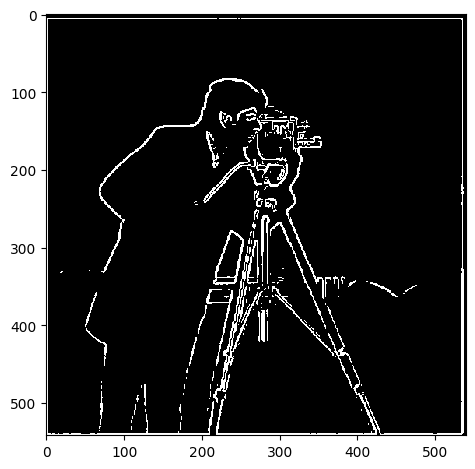

In [414]:
threshold = 0.3
binary = gradient_magnitude_blur > threshold
skio.imshow(binary)

partial_y_normalized = binary.astype(np.float32)  # Convert to float or int

partial_y_normalized = partial_y_normalized / partial_y_normalized.max()

partial_y_8bit = (partial_y_normalized * 255).astype(np.uint8)

skio.imsave("dog_binary.jpg", partial_y_8bit)

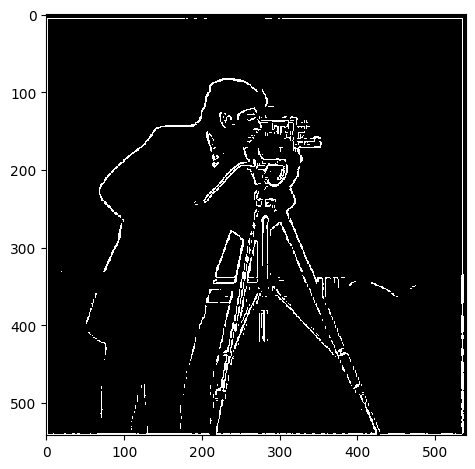

In [415]:
DoG_x = convolve2d(gaussian_2d, d_x, mode='same', boundary='symm')
DoG_y = convolve2d(gaussian_2d, d_y, mode='same', boundary='symm')
partial_x_DoG = convolve2d(im_gray, DoG_x, mode='same', boundary='symm')
partial_y_DoG = convolve2d(im_gray, DoG_y, mode='same', boundary='symm')
DoG = np.sqrt(partial_x_DoG**2 + partial_y_DoG**2)
DoG = DoG/DoG.max()
DoG_bin = DoG>threshold
skio.imshow(DoG_bin)
partial_y_normalized = DoG_bin.astype(np.float32)  # Convert to float or int
partial_y_normalized = partial_y_normalized / partial_y_normalized.max()
partial_y_8bit = (partial_y_normalized * 255).astype(np.uint8)
skio.imsave("dog_binary_2.jpg", partial_y_8bit, cmap='gray')

Image sharpening

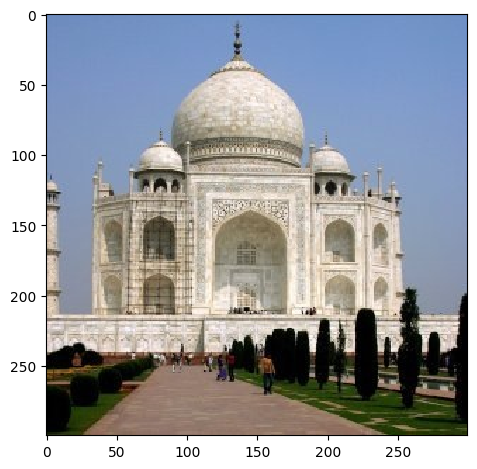

In [416]:
alpha = 1
img = skio.imread("taj.jpg")
skio.imshow(img)

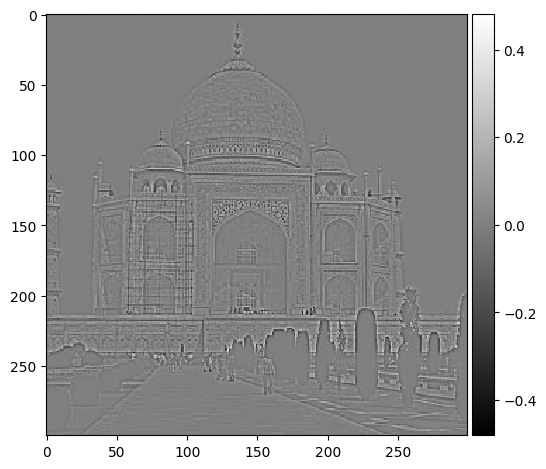

In [425]:
alpha = 1
img = img_as_float(img)
im_gray = color.rgb2gray(img)

# Apply Gaussian convolution to blur the image
im_blurred = convolve2d(im_gray, gaussian_2d, mode='same', boundary='symm')

# Extract high-frequency details
high_freq = im_gray - im_blurred
high_freq = np.expand_dims(high_freq, axis=-1)  # Expand dimensions for compatibility

# Sharpen the image using high-frequency details
sharpen = img + alpha * high_freq
sharpen = np.clip(sharpen, 0, 1)  # Clip values to keep them in range [0, 1]

# Display high-frequency details using skimage
skio.imshow(high_freq.squeeze(), cmap="gray")  # .squeeze() to remove unnecessary dimension

# Normalize high-frequency for saving
partial_y_normalized = high_freq.squeeze().astype(np.float32)  # Remove extra dimension
partial_y_normalized = partial_y_normalized / partial_y_normalized.max()

# Convert to 8-bit integer format
partial_y_8bit = (partial_y_normalized * 255).astype(np.uint8)

# Save the high-frequency image using plt.imsave
plt.imsave("high_freq_taj_2.jpg", partial_y_8bit, cmap='gray')

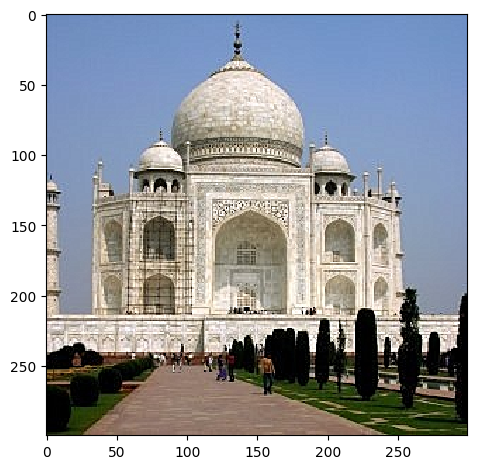

In [419]:
sharpen = sharpen/sharpen.max()
sharpen = np.clip(sharpen, 0, 1)
skio.imshow(sharpen)
plt.imsave("sharpened.jpg", sharpen)

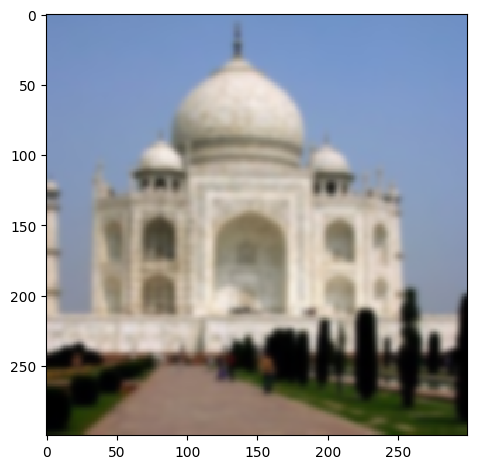

In [420]:
blurred_image = img.copy()
for i in range(3): 
    blurred_image[:, :, i] = gaussian_filter(img[:, :, i], sigma=2)
skio.imshow(blurred_image)
plt.imsave("blurred.jpg", blurred_image)

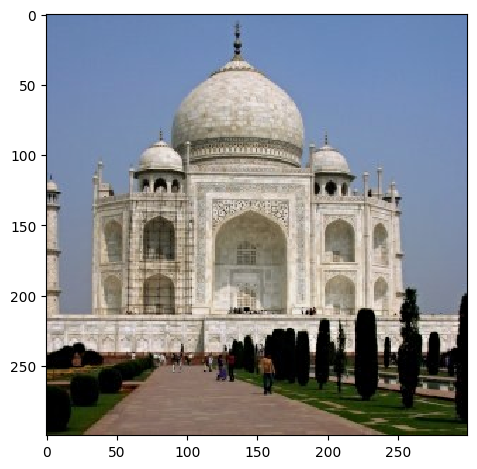

In [421]:
alpha = 2
im_gray = color.rgb2gray(blurred_image)
im_blurred = convolve2d(im_gray, gaussian_2d, mode='same', boundary='symm')
high_freq = im_gray - im_blurred
high_freq = np.expand_dims(high_freq, axis=-1)
sharpen = img+alpha*high_freq
sharpen = sharpen/sharpen.max()
sharpen = np.clip(sharpen, 0, 1)
skio.imshow(sharpen)
plt.imsave("blurred_resharpened.jpg", sharpen)

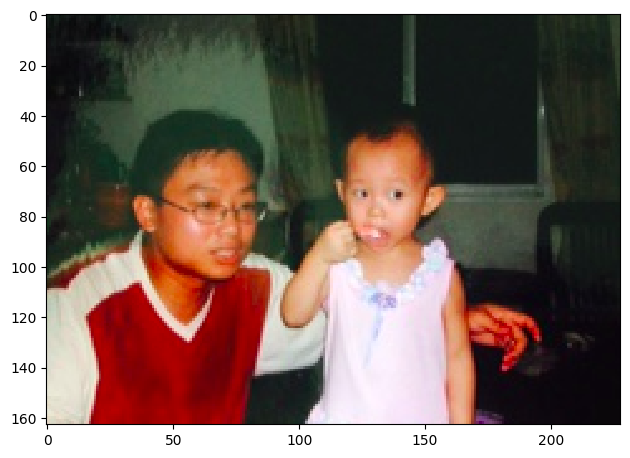

In [391]:
alpha = 1
img = skio.imread("example2.jpg")
skio.imshow(img)

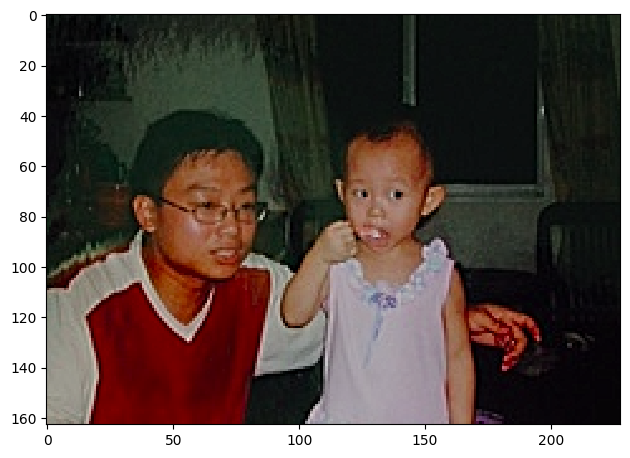

In [393]:
alpha = 2
img = img[:, :, :3]
img = img_as_float(img)
im_gray = color.rgb2gray(img)
im_blurred = convolve2d(im_gray, gaussian_2d, mode='same', boundary='symm')
high_freq = im_gray - im_blurred
high_freq = np.expand_dims(high_freq, axis=-1)
sharpen = img+alpha*high_freq
sharpen = sharpen/sharpen.max()
sharpen = np.clip(sharpen, 0, 1)
skio.imshow(sharpen)
plt.imsave("sharpened_2.jpg", sharpen)

2.2: Hybrid Image

In [435]:
def resize_images(im1, im2, target_size):
    im1_resized = resize(im1, target_size, anti_aliasing=True)
    im2_resized = resize(im2, target_size, anti_aliasing=True)
    return im1_resized, im2_resized
    
def low_pass_filter(image, sigma):
    return gaussian_filter(image, sigma=sigma)

def high_pass_filter(image, sigma):
    low_pass = low_pass_filter(image, sigma)
    return image - low_pass

def create_hybrid_image(image1, image2, sigma1=1, sigma2=1):
    low_frequencies = low_pass_filter(image1, sigma1)
    high_frequencies = high_pass_filter(image2, sigma2)
    hybrid_image = low_frequencies + high_frequencies
    return low_frequencies, high_frequencies, hybrid_image

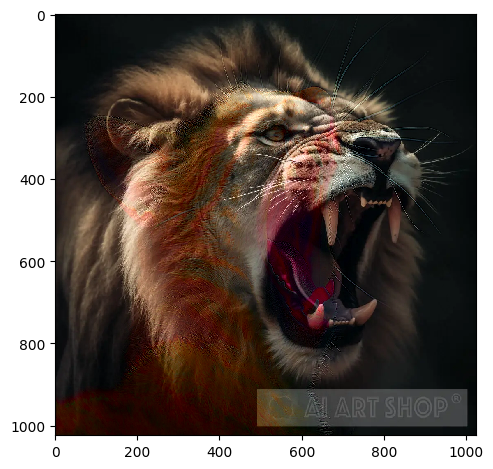

In [436]:
sigma1 = 0.1
sigma2 = 1
img1 = skio.imread("hybrid/lion.jpg")
img2 = skio.imread("hybrid/cat.jpg")
img1, img2 = resize_images(img1, img2, (min(img1.shape[0], img2.shape[0]), min(img1.shape[1], img2.shape[1])))
a, b, hybrid1 = create_hybrid_image(img1,img2, sigma1, sigma2)
hybrid1 = np.clip(hybrid1, 0, 1)
a = np.clip(a, 0, 1)
b = np.clip(b, 0, 1)
hybrid1 = (hybrid1 * 255).astype(np.uint8)
a = (a * 255).astype(np.uint8)
b = (b * 255).astype(np.uint8)

skio.imshow(hybrid1)
skio.imsave("a.jpg", a)
skio.imsave("b.jpg", b)
skio.imsave("hybrid/hybrid1.jpg", hybrid1)

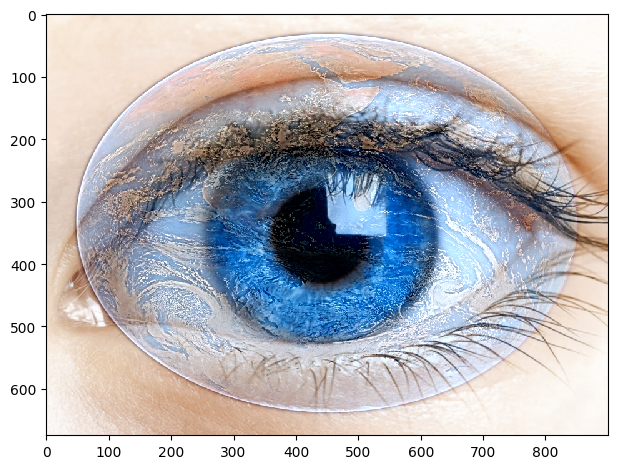

In [437]:
sigma1 = 0.8
sigma2 = 3
img1 = skio.imread("hybrid/eye.jpg")
img2 = skio.imread("hybrid/earth.jpg")
img2 = img2[:,:,:3]
img1, img2 = resize_images(img1, img2, (min(img1.shape[0], img2.shape[0]), min(img1.shape[1], img2.shape[1])))
img1low, img2high, hybrid2 = create_hybrid_image(img1,img2, sigma1, sigma2)

hybrid1 = np.clip(hybrid1, 0, 1)
img1low = np.clip(img1low, 0, 1)
img2high = np.clip(img2high, 0, 1)
hybrid1 = (hybrid1 * 255).astype(np.uint8)
img1low = (img1low * 255).astype(np.uint8)
img2high = (img2high * 255).astype(np.uint8)

skio.imshow(hybrid1)
skio.imsave("c.jpg", img1low)
skio.imsave("d.jpg", img2high)

hybrid2 = np.clip(hybrid2, 0, 1)
hybrid2 = (hybrid2 * 255).astype(np.uint8)
skio.imshow(hybrid2)
skio.imsave("hybrid/hybrid2.jpg", hybrid2)

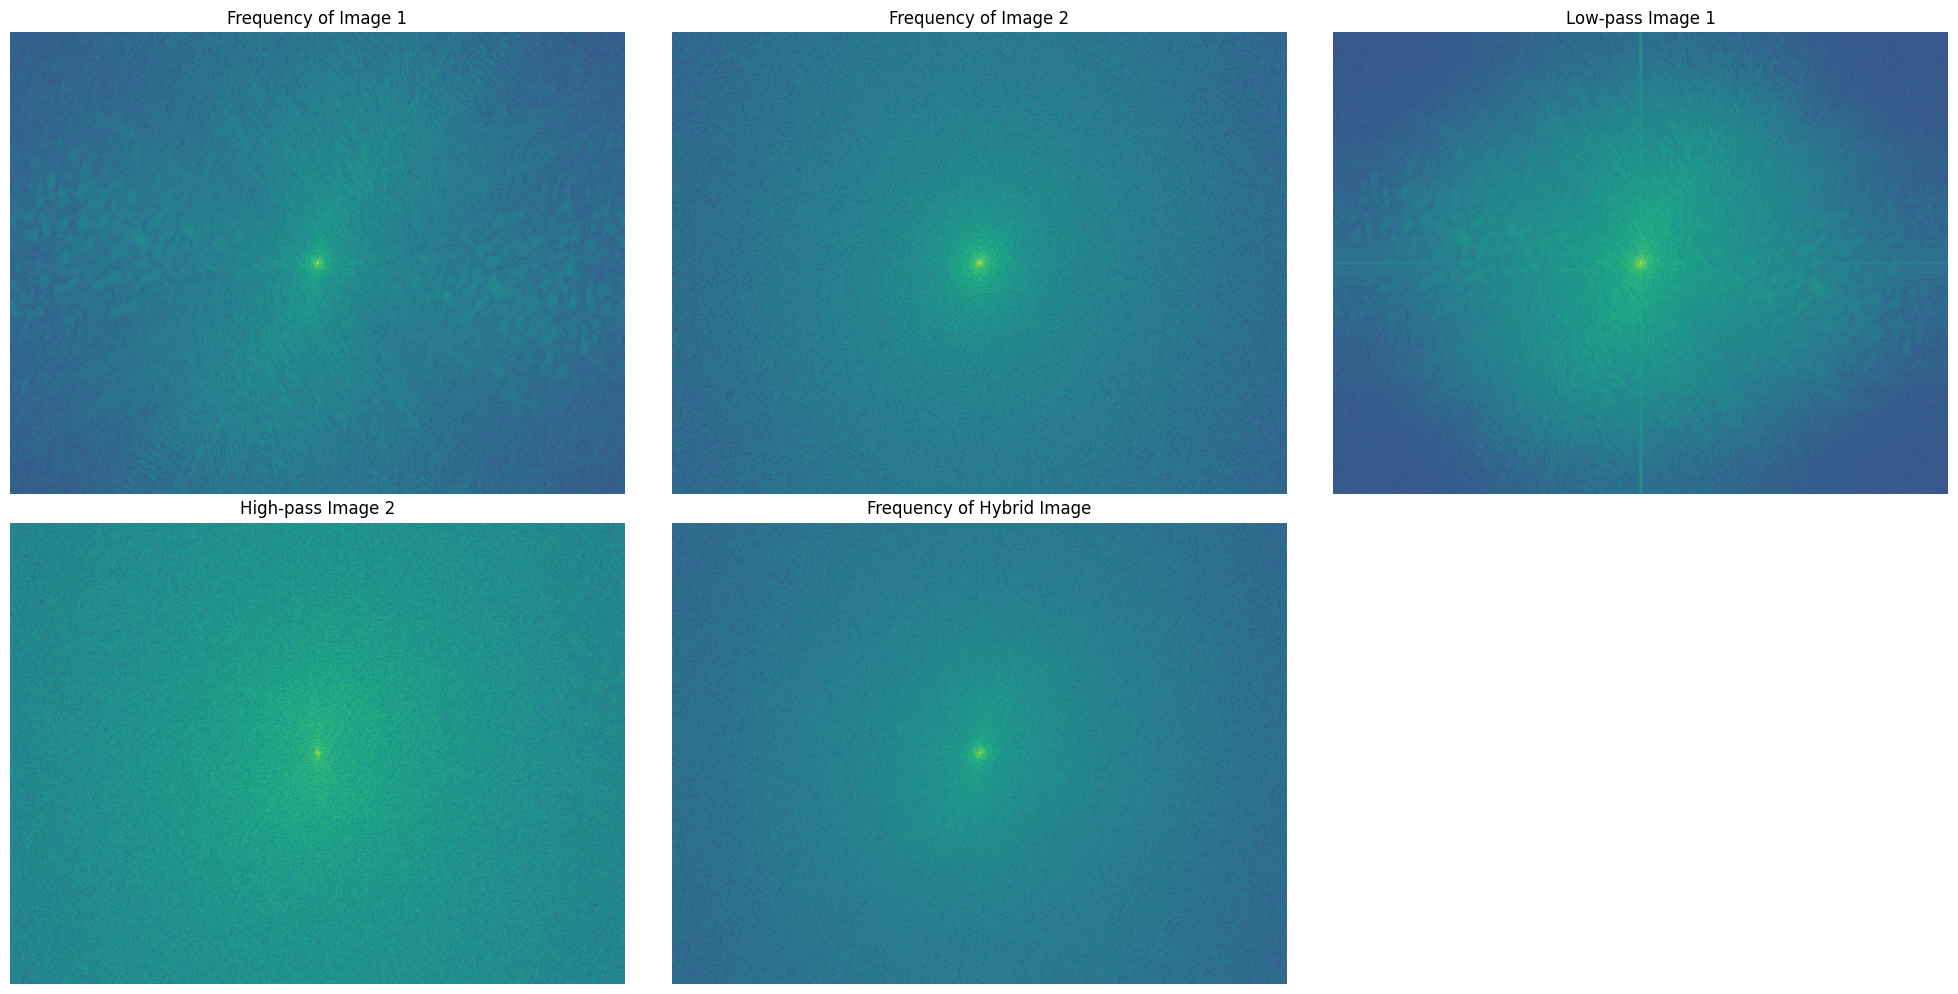

In [438]:
def plot_frequency_analysis(img, title):
    freq_analysis = np.log(np.abs(np.fft.fftshift(np.fft.fft2(img))))
    plt.imshow(freq_analysis)
    plt.imsave("hybrid/" + title + ".jpg", freq_analysis)
    plt.title(title)
    plt.axis('off')

sigma1 = 2
sigma2 = 3
    
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plot_frequency_analysis(color.rgb2gray(img1), "Frequency of Image 1")

plt.subplot(2, 3, 2)
plot_frequency_analysis(color.rgb2gray(img2), "Frequency of Image 2")

plt.subplot(2, 3, 3)
plot_frequency_analysis(color.rgb2gray(img1low), "Low-pass Image 1")

plt.subplot(2, 3, 4)
plot_frequency_analysis(color.rgb2gray(img2high), "High-pass Image 2")

plt.subplot(2, 3, 5)
plot_frequency_analysis(color.rgb2gray(hybrid2), "Frequency of Hybrid Image")

plt.tight_layout()
plt.show()

2.3: Gaussian and Laplacian Stacks

In [471]:
def convolve3(image, kernel):
    convolved_image = np.zeros_like(image)
    for i in range(image.shape[2]):  
        convolved_image[:, :, i] = convolve(image[:, :, i], kernel, mode='reflect')
    return convolved_image

def gaussian_stack(image, level=5, sigma=5):
    im = image.copy()
    stack = np.zeros((image.shape[0], image.shape[1], image.shape[2], level + 1))
    for l in range(level):
        kernel_size = 3 + 2**(l + 2)
        gaussian_1d = cv2.getGaussianKernel(ksize=kernel_size, sigma=sigma)
        gaussian_2d = gaussian_1d @ gaussian_1d.T
        stack[:, :, :, l] = im
        im = convolve3(im, gaussian_2d)
    stack[:, :, :, -1] = im  # Store the last level
    return stack

def laplacian_stack(g):
    laplacian_stack = g[:, :, :, :-1] - g[:, :, :, 1:]
    last_level = g[:, :, :, -1]
    laplacian_stack = np.concatenate((laplacian_stack, last_level[:, :, :, np.newaxis]), axis=-1)
    return laplacian_stack

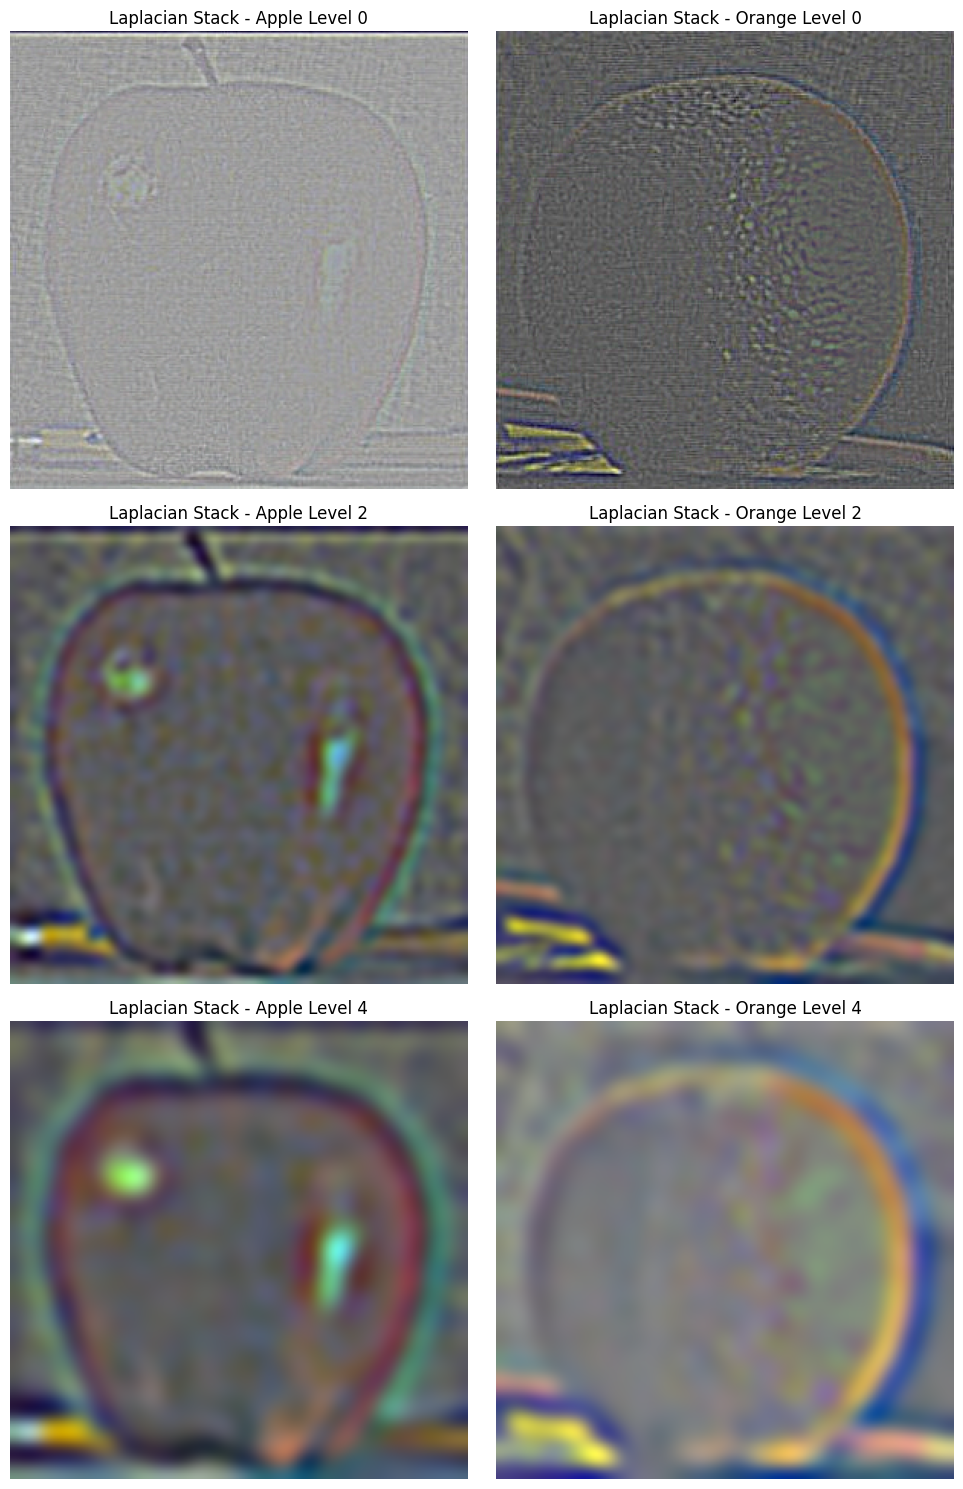

In [472]:
apple = skio.imread("apple.jpeg").astype(np.float32) / 255.0
orange = skio.imread("orange.jpeg").astype(np.float32) / 255.0

apple = apple[:min(apple.shape[0], orange.shape[0]), :min(apple.shape[1], orange.shape[1])]
orange = orange[:min(apple.shape[0], orange.shape[0]), :min(apple.shape[1], orange.shape[1])]

levels = 5

g_stack_apple = gaussian_stack(apple, levels)
g_stack_orange = gaussian_stack(orange, levels)

l_stack_apple = laplacian_stack(g_stack_apple)
l_stack_orange = laplacian_stack(g_stack_orange)

selected_levels = [0, 2, 4]
fig, axs = plt.subplots(len(selected_levels), 2, figsize=(10, 15))

for i, level in enumerate(selected_levels):
    norm_apple = (l_stack_apple[:, :, :, level] - l_stack_apple[:, :, :, level].min()) / (
        l_stack_apple[:, :, :, level].max() - l_stack_apple[:, :, :, level].min()
    )
    norm_orange = (l_stack_orange[:, :, :, level] - l_stack_orange[:, :, :, level].min()) / (
        l_stack_orange[:, :, :, level].max() - l_stack_orange[:, :, :, level].min()
    )
    axs[i, 0].imshow(norm_apple)
    axs[i, 0].set_title(f'Laplacian Stack - Apple Level {level}')
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(norm_orange)
    axs[i, 1].set_title(f'Laplacian Stack - Orange Level {level}')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.savefig("laplacian_stacks_plot.png", dpi=300)
plt.show()

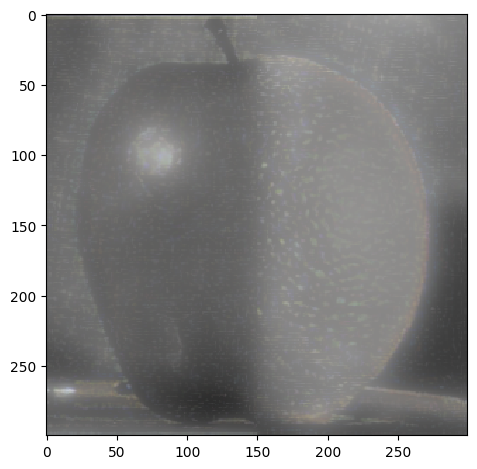

In [495]:
def blend_stacks(one, two, mask_stack):
    res = np.zeros_like(one)
    for l in range(one.shape[3]):
        res[:,:,:,l] = one[:,:,:,l] * mask_stack[:,:,:,l] + two[:,:,:,l] * (1-mask_stack[:,:,:,l])
    return res

def reconstruct_image(blended_stack):
    reconstructed_image = blended_stack[:, :, :, -1]
    for i in range(blended_stack.shape[-1] - 2, -1, -1):
        reconstructed_image = blended_stack[:, :, :, i] + filters.gaussian(reconstructed_image, sigma=2)
    return np.clip(reconstructed_image, 0, 1)

mask = np.ones_like(apple)  
mask[:, mask.shape[1]//2:, :] = 0
mask_stack = gaussian_stack(mask)

blended = blend_stacks(l_stack_apple, l_stack_orange, mask_stack)
blended = np.clip(blended, 0, 1)
final = reconstruct_image(blended)

skio.imshow(final)
final = final.astype(np.float32)
final = np.clip(final, 0, 1)
final_uint8 = (final * 255).astype(np.uint8)

skio.imsave("orapple.jpg", final_uint8)

In [498]:
final = mask.astype(np.float32)
final = np.clip(final, 0, 1)
final_uint8 = (final * 255).astype(np.uint8)

skio.imsave("orapple_mask.jpg", final_uint8)

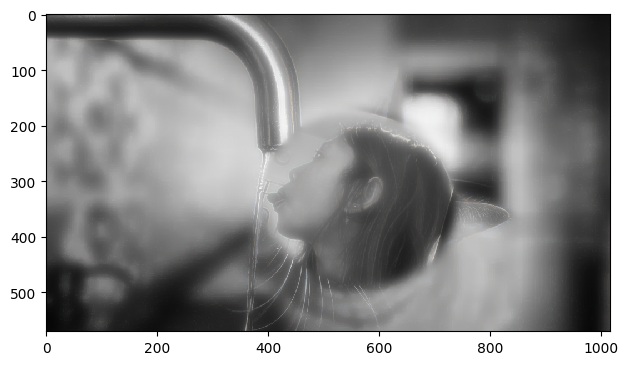

In [492]:
mask = skio.imread("mask.jpg").astype(np.float32) / 255.0
mask = (mask-mask.min())/(mask.max()-mask.min())
mask_stack = gaussian_stack(mask)

img1 = skio.imread("cat.jpg").astype(np.float32) / 255.0
img2 = skio.imread("me.jpg").astype(np.float32) / 255.0

levels = 5

g_stack_one = gaussian_stack(img1, levels)
g_stack_two = gaussian_stack(img2, levels)

l_stack_one = laplacian_stack(g_stack_one)
l_stack_two = laplacian_stack(g_stack_two)

blended = blend_stacks(l_stack_two, l_stack_one, mask_stack)
blended = np.clip(blended, 0, 1)
final = reconstruct_image(blended)

skio.imshow(final)
final = final.astype(np.float32)
final = np.clip(final, 0, 1)
final_uint8 = (final * 255).astype(np.uint8)

skio.imsave("cat_michelle.jpg", final_uint8)

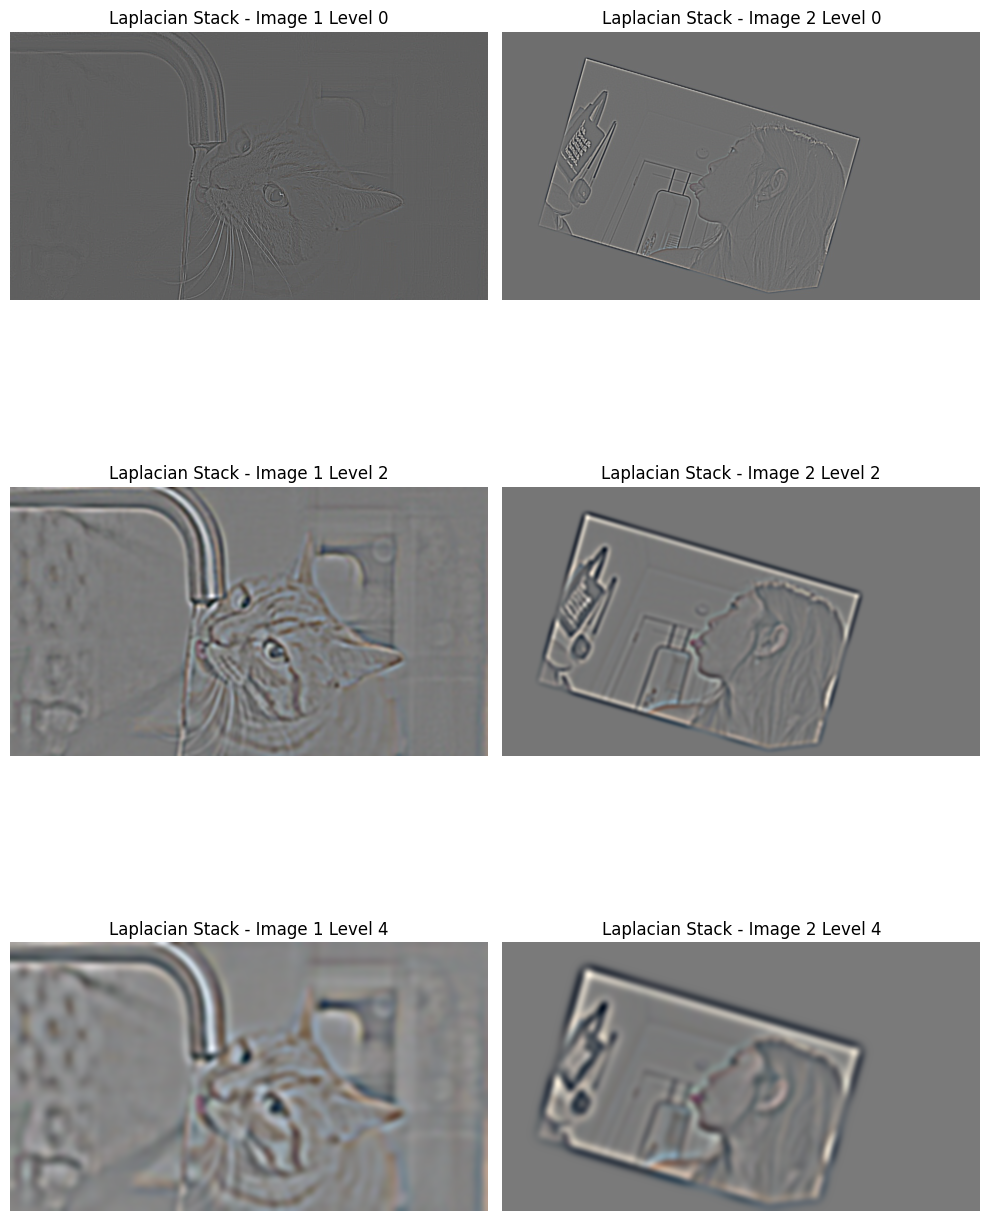

In [494]:
fig, axs = plt.subplots(len(selected_levels), 2, figsize=(10, 15))

for i, level in enumerate(selected_levels):
    norm_one = (l_stack_one[:, :, :, level] - l_stack_one[:, :, :, level].min()) / (
        l_stack_one[:, :, :, level].max() - l_stack_one[:, :, :, level].min()
    )
    
    norm_two = (l_stack_two[:, :, :, level] - l_stack_two[:, :, :, level].min()) / (
        l_stack_two[:, :, :, level].max() - l_stack_two[:, :, :, level].min()
    )
    
    axs[i, 0].imshow(norm_one)
    axs[i, 0].set_title(f'Laplacian Stack - Image 1 Level {level}')
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(norm_two)
    axs[i, 1].set_title(f'Laplacian Stack - Image 2 Level {level}')
    axs[i, 1].axis('off')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("laplacian_stacks_plot_2.png", dpi=300)
plt.show()